# Predicting bank telemarketing success
**Note: This python notebook only contains the python script used for the assignment and should not be read as a stand-alone document. Please read the assignment write-up in the Word document before reviewing the python notebook as the Word document contains the explanations for certain decisions made within the python notebook.**

In [1]:
#Import of libraries used
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Fixing the random seed for the entire workpaper
np.random.seed(2020)

#Import datset
df_old = pd.read_excel("Processed_bank_full.xlsx")

# 2.2 Data pre-processing
Data pre-processing consists of the following:
- Data cleansing
- Feature engineering
- Data visualisation

### 2.2.1 Data cleansing

In [2]:
#Read the dataset
df_old.info()
df_pro = df_old.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
#Replace column headers with recognisable feature names
df_pro.rename(columns={"default": "credit_default", 
                   "housing": "house_loan", 
                   "loan": "personal_loan",
                   "campaign": "num_campaign",
                   "pdays" : "p_days", 
                   "previous" : "p_num", 
                   "poutcome" : "p_outcome", 
                   "emp.var.rate" : "EVI", 
                   "cons.price.idx" : "CPI", 
                   "cons.conf.idx" : "CCI", 
                   "nr.employed" : "country_employment", 
                   "y" : "outcome"}, inplace = True)
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41188 non-null  int64  
 1   job                 41188 non-null  object 
 2   marital             41188 non-null  object 
 3   education           41188 non-null  object 
 4   credit_default      41188 non-null  object 
 5   house_loan          41188 non-null  object 
 6   personal_loan       41188 non-null  object 
 7   contact             41188 non-null  object 
 8   month               41188 non-null  object 
 9   day_of_week         41188 non-null  object 
 10  duration            41188 non-null  int64  
 11  num_campaign        41188 non-null  int64  
 12  p_days              41188 non-null  int64  
 13  p_num               41188 non-null  int64  
 14  p_outcome           41188 non-null  object 
 15  EVI                 41188 non-null  float64
 16  CPI 

In [4]:
#Drop features pertaining to current campaign
df_pro.drop(columns = ["duration", "num_campaign"], inplace = True)

In [5]:
#Replace all "unknown" values with NaN
df_pro.replace("unknown", np.NaN, inplace = True)

#Generate list of all columns with NaN
print("Number of missing values:")
for col in df_pro.columns:
    print("\t%s: %d" % (col, df_pro[col].isna().sum()))

Number of missing values:
	age: 0
	job: 330
	marital: 80
	education: 1731
	credit_default: 8597
	house_loan: 990
	personal_loan: 990
	contact: 0
	month: 0
	day_of_week: 0
	p_days: 0
	p_num: 0
	p_outcome: 0
	EVI: 0
	CPI: 0
	CCI: 0
	euribor3m: 0
	country_employment: 0
	outcome: 0


In [6]:
#NaN values noted in features "job", "marital", "education", "credit_default", "house_loan", "personal_loan"
#To replace Nan with the respective mode value of each feature
for col in df_pro.columns:
    df_pro[col].fillna(df_pro[col].value_counts().idxmax(), inplace = True)

In [7]:
#Check that all NaN values have been filled
df_pro[df_pro.isna().any(axis = 1)]

,age,job,marital,education,credit_default,house_loan,personal_loan,contact,month,day_of_week,p_days,p_num,p_outcome,EVI,CPI,CCI,euribor3m,country_employment,outcome


### 2.2.2 Feature engineering

In [8]:
#Create new feature "debt"
df_pro["debt"] = df_pro["credit_default"] + df_pro["house_loan"] + df_pro["personal_loan"]

df_pro["debt"].unique()

array(['nonono', 'noyesno', 'nonoyes', 'noyesyes', 'yesnono', 'yesyesno'],
      dtype=object)

In [9]:
#Replace the different permutations in "debt" with the respective intended value
df_pro["debt"].replace("nonono", "no", inplace = True)
df_pro["debt"].replace("noyesno", "yes", inplace = True)
df_pro["debt"].replace("noyesyes", "yes", inplace = True)
df_pro["debt"].replace("nonoyes", "yes", inplace = True)
df_pro["debt"].replace("yesnono", "yes", inplace = True)
df_pro["debt"].replace("yesyesno", "yes", inplace = True)

#Check that all permutations have been replaced
df_pro["debt"].unique()

array(['no', 'yes'], dtype=object)

In [10]:
#Dropping features "credit_default", "house_loan", "personal_loan", "p_days", "p_num", "country_employment"
df_pro.drop(columns = ["credit_default", "house_loan", "personal_loan", "p_days", "p_num", "country_employment"], inplace = True)

In [11]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  int64  
 1   job          41188 non-null  object 
 2   marital      41188 non-null  object 
 3   education    41188 non-null  object 
 4   contact      41188 non-null  object 
 5   month        41188 non-null  object 
 6   day_of_week  41188 non-null  object 
 7   p_outcome    41188 non-null  object 
 8   EVI          41188 non-null  float64
 9   CPI          41188 non-null  float64
 10  CCI          41188 non-null  float64
 11  euribor3m    41188 non-null  float64
 12  outcome      41188 non-null  object 
 13  debt         41188 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.4+ MB


### 2.3 Data visualisation

In [12]:
#Create a copy of dataset for visualisation purposes
#The train and test datasets will be individually scaled again later to prevent data leakage from test data.
df_visual = df_pro.copy()

#Selct all the numeric columns (float & integer)
num_cols = [col for col in df_visual.columns if df_visual[col].dtype != np.object]

num_cols

['age', 'EVI', 'CPI', 'CCI', 'euribor3m']

In [13]:
#Scale the numeric columns
from sklearn.preprocessing import MinMaxScaler
 
df_visual[num_cols] = MinMaxScaler().fit_transform(df_visual[num_cols])

##### Boxplot of numeric features

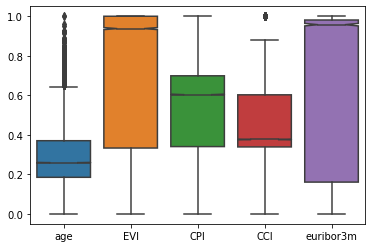

In [14]:
#Boxplot of numeric features to identify outliers
sns.boxplot(data = df_visual, notch = 1)

##### Heatmap correlation of numeric features

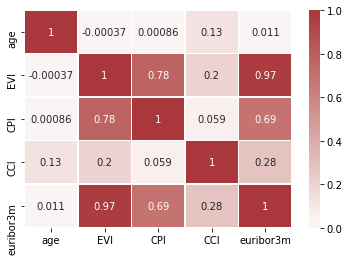

In [15]:
#Heatmap of numeric features to identify correlation
sns.heatmap(df_visual.corr(), center = 0, cmap = "vlag", linewidths = 0.5, annot = True)

In [16]:
#Drop feature "euribor3m"
df_pro.drop(columns = "euribor3m", inplace = True)

In [17]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  int64  
 1   job          41188 non-null  object 
 2   marital      41188 non-null  object 
 3   education    41188 non-null  object 
 4   contact      41188 non-null  object 
 5   month        41188 non-null  object 
 6   day_of_week  41188 non-null  object 
 7   p_outcome    41188 non-null  object 
 8   EVI          41188 non-null  float64
 9   CPI          41188 non-null  float64
 10  CCI          41188 non-null  float64
 11  outcome      41188 non-null  object 
 12  debt         41188 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.1+ MB


##### Encoding

In [18]:
#Label encoding for target: 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_pro["outcome"] = le.fit_transform(df_pro["outcome"])

#Create dictionary of transformation for easier reference
keys = le.classes_
values = le.transform(le.classes_)
target_dict = {"outcome": dict(zip(keys, values))}
target_dict

{'outcome': {'no': 0, 'yes': 1}}

In [19]:
#One-hot encoding for categorical features:
from sklearn.preprocessing import OneHotEncoder

#Find all categorical columns
cat_cols = [col for col in df_pro.columns if df_pro[col].dtype == np.object]

#Replace all values in categorical columns with colname_value and one-hot encode
#This one-hot encoding method is modified from Sukanda Roy's one-hot encoding script
#Source: https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe (sparse, df, vectorizer, name):
    '''
        This function adds one-hot encoded column to the dataframe.
    '''
    for i, col in enumerate (vectorizer.get_feature_names()):
        colname = name + "_" + col
        df[colname] = sparse[:, i].toarray().ravel().tolist()
        
    return df

def OneHotEncoder (categorical_cols, df):
    '''
        This function takes categorical column names as inputs. The objective
        of this function is to take the column names iteratively and encode the 
        features using One hot Encoding mechanism and also adding the encoded feature
        to the respective dataframe
    '''
    for i in categorical_cols:
        Vectorizer = CountVectorizer(token_pattern = "[A-Za-z0-9-.]+")
        print("Encoding for feature: ", i)
    
        #Encoding training dataset 
        temp_cols = Vectorizer.fit_transform(df[i])
        X_train = add_onehot_to_dataframe(temp_cols, df, Vectorizer, i)
        
    #Drop the one-hot encoded columns
    for i in categorical_cols:
        df.drop(columns = i, inplace = True)
        print("Column " + i + " dropped.")
        
    print("One-hot encoding completed.")
    

In [20]:
#Implementing the one-hot encoding function
OneHotEncoder(cat_cols, df_pro)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  p_outcome
Encoding for feature:  debt
Column job dropped.
Column marital dropped.
Column education dropped.
Column contact dropped.
Column month dropped.
Column day_of_week dropped.
Column p_outcome dropped.
Column debt dropped.
One-hot encoding completed.


In [21]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   EVI                            41188 non-null  float64
 2   CPI                            41188 non-null  float64
 3   CCI                            41188 non-null  float64
 4   outcome                        41188 non-null  int32  
 5   job_admin.                     41188 non-null  int64  
 6   job_blue-collar                41188 non-null  int64  
 7   job_entrepreneur               41188 non-null  int64  
 8   job_housemaid                  41188 non-null  int64  
 9   job_management                 41188 non-null  int64  
 10  job_retired                    41188 non-null  int64  
 11  job_self-employed              41188 non-null  int64  
 12  job_services                   41188 non-null 

In [22]:
#Split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

y_col = "outcome"

feature_cols = [x for x in df_pro.columns if x != y_col]
X_df_pro_new = df_pro[feature_cols]
y_df_pro_new = df_pro[y_col]

X_train_1, X_test_old, y_train_1, y_test = train_test_split(X_df_pro_new, y_df_pro_new, test_size = 0.2, stratify = y_df_pro_new, random_state = 2020)

In [23]:
#Split the train set further into train and validation datasets
X_train_2, X_valid_old, y_train, y_valid = train_test_split(X_train_1, y_train_1, test_size = 0.2, stratify = y_train_1, random_state = 2020)

In [24]:
#Scaling train set using MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train_2)

#Scaling validation set using parameters from train set to prevent data leakage
X_valid = mms.transform(X_valid_old)

#Scaling test set using parameters from train set to prevent data leakage
X_test = mms.transform(X_test_old)

# 3. Model training and testing

### 3.1 Model training

##### Tree Classifiers

In [25]:
#Mute warnings
import warnings
warnings.filterwarnings("ignore", module = "sklearn")

In [26]:
#Using Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rf = RandomForestClassifier()
recall_list_rf = []

#Using a variation of trees, compute the Recall
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500, 600, 700]:
    rf.set_params(n_estimators = n_trees, bootstrap = True, n_jobs = -1, random_state = 2020)
    rf.fit(X_train, y_train)
    y_predict = rf.predict(X_train)
    recall = recall_score(y_train, y_predict)
    recall_list_rf.append(pd.Series({"n_trees": n_trees, "Recall": recall}))
    
rf_df = pd.concat(recall_list_rf, axis = 1).T.set_index("n_trees")

In [27]:
#Using Extra Trees classifier
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier()

recall_list_et = []

#Using a variation of trees, compute the Recall
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500, 600, 700]:
    et.set_params(n_estimators = n_trees, bootstrap = True, n_jobs = -1, random_state = 2020)
    et.fit(X_train, y_train)
    y_predict = et.predict(X_train)
    recall = recall_score(y_train, y_predict)
    recall_list_et.append(pd.Series({"n_trees": n_trees, "Recall": recall}))

et_df = pd.concat(recall_list_et, axis = 1).T.set_index("n_trees")

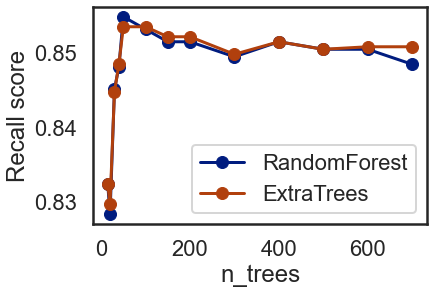

In [28]:
#Compare Random Forest classifier and Extra Trees classifier based on Recall
recall_df = pd.concat([rf_df.rename(columns = {"Recall":"RandomForest"}),
                    et_df.rename(columns = {"Recall":"ExtraTrees"})], axis = 1)

#Visualisation of Random Forest classifier vs Extra Trees classifier
sns.set_context("poster")
sns.set_palette("dark")
sns.set_style("white")

ax = recall_df.plot(marker = "o")
ax.set(ylabel = "Recall score");

##### Logistic Regression

In [29]:
#Using Logistic Regression CV classifier
from sklearn.linear_model import LogisticRegressionCV

lg = LogisticRegressionCV()
score_list = []

#Using a variation of l1 parameters, compute the score (default = accuracy)
#Note that the default Cs = 10, cv = None (stratified 5-folds) is used 
l1_parameter = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

lg.set_params(penalty = "elasticnet", l1_ratios = l1_parameter, scoring = "recall", solver = "saga", random_state = 2020)
lg.fit(X_train, y_train)
score = lg.scores_

In [30]:
#Find the mean score (accuracy) of each parameter
parameters = pd.DataFrame(np.concatenate(score[1], axis = 0), columns = l1_parameter)
parameters.mean()

0.0    0.168316
0.1    0.166835
0.2    0.165926
0.3    0.165455
0.4    0.165051
0.5    0.165152
0.6    0.165286
0.7    0.165455
0.8    0.165758
0.9    0.165825
1.0    0.166061
dtype: float64

##### Support Vector Machine

In [31]:
#Using Linear Support Vector classifier
from sklearn.svm import LinearSVC

lsv = LinearSVC()

C_range = [0.01, 0.1, 1, 10, 100, 200]
score_l1 = []

for C in C_range: 
    lsv.set_params(penalty = "l2", C = C, random_state = 2020)
    lsv.fit(X_train, y_train)
    y_predict = lsv.predict(X_train)
    recall = recall_score(y_train, y_predict)
    score_l1.append(recall)

In [32]:
#Generate the list of scores (Recall)
score_table = pd.DataFrame(np.asarray(score_l1), index = C_range)
score_table.rename(columns = {0: "Recall score"}, inplace = True)
score_table

,Recall score
0.01,0.200337
0.10,0.211448
1.00,0.216498
10.00,0.218519
100.00,0.186532
200.00,0.146801


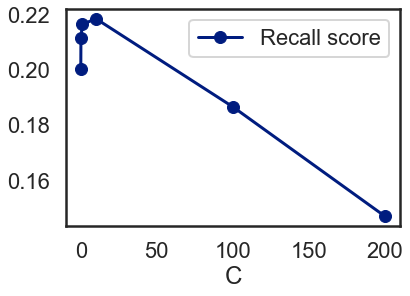

In [33]:
#Visualisation of score_table
sns.set_context("poster")
sns.set_palette("dark")
sns.set_style("white")

ax = score_table.plot(marker = "o")
ax.set(xlabel = "C");

### 3.2 Testing on validation set

##### Random Forest classifier

In [34]:
#Random Forest classifier on validation set using 50 estimators
rf_model_valid = RandomForestClassifier().set_params(n_estimators = 50, bootstrap = True, n_jobs = -1, random_state = 2020)
rf_model_valid.fit(X_train, y_train)
rf_y_pred = rf_model_valid.predict(X_valid)

In [35]:
#Generating the scoring matrix of the Random Forest classifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

#Function for performance score for each outcome label
def class_report (y, y_predict):
    print(classification_report(y, y_predict))

#Function for overcall performance score
def performance_score (y, y_predict):
    performance = pd.DataFrame({'accuracy': accuracy_score(y, y_predict),
                             'precision': precision_score(y, y_predict),
                             'recall': recall_score(y, y_predict),
                             'f1': f1_score(y, y_predict),
                             'auc': roc_auc_score(y, y_predict)},
                             index = pd.Index([0]))

    print(performance)


class_report(y_valid, rf_y_pred)
performance_score(y_valid, rf_y_pred)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5848
           1       0.42      0.27      0.33       742

    accuracy                           0.88      6590
   macro avg       0.67      0.61      0.63      6590
weighted avg       0.86      0.88      0.86      6590

   accuracy  precision    recall        f1       auc
0  0.876328   0.421842  0.265499  0.325889  0.609665


##### Logistic Regression classifier

In [36]:
#Logistic Regression CV classifier on test set using Ridge Regression
lg_model_valid = LogisticRegressionCV().set_params(penalty = "l2", solver = "saga", random_state = 2020)
lg_model_valid.fit(X_train, y_train)
lg_y_pred = lg_model_valid.predict(X_valid)

In [37]:
#Generating the scoring matrix of the Logistic Regression CV classifier
class_report(y_valid, lg_y_pred)
performance_score(y_valid, lg_y_pred)

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      5848
           1       0.64      0.20      0.30       742

    accuracy                           0.90      6590
   macro avg       0.77      0.59      0.62      6590
weighted avg       0.88      0.90      0.87      6590

   accuracy  precision    recall        f1       auc
0  0.897269   0.640693  0.199461  0.304214  0.592634


##### Linear Support Vector classifier

In [38]:
#Linear Support Vector classifier on test set using C = 10
lsv_model_test = LinearSVC().set_params(C = 10, random_state = 2020)
lsv_model_test.fit(X_train, y_train)
lsv_y_pred = lsv_model_test.predict(X_valid)

In [39]:
#Generating the scoring matrix of the Linear Support Vector classifier
class_report(y_valid, lsv_y_pred)
performance_score(y_valid, lsv_y_pred)

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      5848
           1       0.64      0.19      0.29       742

    accuracy                           0.90      6590
   macro avg       0.77      0.59      0.62      6590
weighted avg       0.88      0.90      0.87      6590

   accuracy  precision    recall        f1       auc
0  0.896813    0.63964  0.191375  0.294606  0.588847


### 3.3 Model Tuning

### 3.3.1 Addressing imbalanced dataset

##### SMOTE-NC

In [40]:
#Resample the test data using SMOTE-NC
#Please pip install imblearn if not installed previously
from imblearn.over_sampling import SMOTENC

#Using default k-nn of 5
sm = SMOTENC(random_state = 2020, categorical_features = [4, 46]) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

Using TensorFlow backend.


In [41]:
#Check number of synthetic data created
len(y_train_res) - len(y_train)

20420

In [42]:
#Check count of values of each label before SMOTE-NC
y_train.value_counts()

0    23390
1     2970
Name: outcome, dtype: int64

In [43]:
#Convert array of y_train after SMOTE-NC to DataFrame
y_train_SMOTE = pd.DataFrame.from_records(y_train_res.reshape(-1,1))

#Check count of values of each label after SMOTE-NC
y_train_SMOTE[0].value_counts()

1    23390
0    23390
Name: 0, dtype: int64

##### Random Forest classifier

In [44]:
#Retrain Random Forest classifer
rf_model_SMOTE = RandomForestClassifier().set_params(n_estimators = 50, bootstrap = True, n_jobs = -1, random_state = 2020)
rf_model_SMOTE.fit(X_train_res, y_train_res)
rf_y_pred = rf_model_SMOTE.predict(X_valid)

In [45]:
#Generating the scoring matrix of the Random Forest classifier
class_report(y_valid, rf_y_pred)
performance_score(y_valid, rf_y_pred)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      5848
           1       0.35      0.32      0.33       742

    accuracy                           0.86      6590
   macro avg       0.63      0.62      0.63      6590
weighted avg       0.85      0.86      0.85      6590

   accuracy  precision    recall        f1       auc
0  0.856146   0.348083  0.318059  0.332394  0.621239


##### Logistic Regression classifier

In [46]:
#Retrain Logistic Regression classifier
lg_model_SMOTE = LogisticRegressionCV().set_params(penalty = "l2", solver = "saga", random_state = 2020)
lg_model_SMOTE.fit(X_train_res, y_train_res)
lg_y_pred = lg_model_SMOTE.predict(X_valid)

In [47]:
#Generating the scoring matrix of the Logistic Regression classifier
class_report(y_valid, lg_y_pred)
performance_score(y_valid, lg_y_pred)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5848
           1       0.33      0.61      0.43       742

    accuracy                           0.82      6590
   macro avg       0.64      0.73      0.66      6590
weighted avg       0.88      0.82      0.84      6590

   accuracy  precision    recall       f1      auc
0  0.817602   0.332362  0.614555  0.43141  0.72896


##### Linear Support Vector classifier

In [48]:
#Retrain Linear Support Vector classifier
lsv_model_SMOTE = LinearSVC().set_params(C = 10, random_state = 2020)
lsv_model_SMOTE.fit(X_train_res, y_train_res)
lsv_y_pred = lsv_model_SMOTE.predict(X_valid)

In [49]:
#Generating the scoring matrix of the Linear Support Vector classifier
class_report(y_valid, lsv_y_pred)
performance_score(y_valid, lsv_y_pred)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5848
           1       0.33      0.62      0.43       742

    accuracy                           0.81      6590
   macro avg       0.64      0.73      0.66      6590
weighted avg       0.88      0.81      0.84      6590

   accuracy  precision    recall        f1       auc
0  0.813202   0.326473  0.619946  0.427708  0.728834


##### Class weights

In [50]:
#Computing class weights
from sklearn.utils import class_weight

outcome = [0, 1]
class_weights = dict(zip(outcome, class_weight.compute_class_weight(class_weight = "balanced", classes = [0, 1], y = y_train).tolist()))
class_weights

{0: 0.5634886703719538, 1: 4.437710437710438}

##### Random Forest Classifier

In [51]:
#Random Forest classifier with class weights
rf_model_cw = RandomForestClassifier().set_params(n_estimators = 50, bootstrap = True, n_jobs = -1, random_state = 2020, class_weight = class_weights)
rf_model_cw.fit(X_train, y_train)
rf_y_pred = rf_model_cw.predict(X_valid)

In [52]:
#Generating the scoring matrix of the Random Forest classifier
class_report(y_valid, rf_y_pred)
performance_score(y_valid, rf_y_pred)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      5848
           1       0.39      0.28      0.32       742

    accuracy                           0.87      6590
   macro avg       0.65      0.61      0.63      6590
weighted avg       0.85      0.87      0.86      6590

   accuracy  precision    recall        f1       auc
0  0.869499   0.389098  0.278976  0.324961  0.611701


##### Logistic Regression classifier

In [53]:
#Logistic Regression CV classifier with class weights
lg_model_cw = LogisticRegressionCV().set_params(penalty = "l2", solver = "saga", random_state = 2020, class_weight = class_weights)
lg_model_cw.fit(X_train, y_train)
lg_y_pred = lg_model_cw.predict(X_valid)

In [54]:
#Generating the scoring matrix of the Logistic Regression CV classifier
class_report(y_valid, lg_y_pred)
performance_score(y_valid, lg_y_pred)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5848
           1       0.33      0.62      0.43       742

    accuracy                           0.82      6590
   macro avg       0.64      0.73      0.66      6590
weighted avg       0.88      0.82      0.84      6590

   accuracy  precision    recall       f1       auc
0  0.818058   0.333333  0.615903  0.43256  0.729805


##### Linear Support Vector classifier

In [55]:
#Support Linear Vector classifier with class weights
lsv_model_cw = LinearSVC().set_params(C = 10, random_state = 2020, class_weight = class_weights)
lsv_model_cw.fit(X_train, y_train)
lsv_y_pred = lsv_model_cw.predict(X_valid)

In [56]:
#Generating the scoring matrix of the Linear Support Vector classifier
class_report(y_valid, lsv_y_pred)
performance_score(y_valid, lsv_y_pred)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5848
           1       0.38      0.59      0.46       742

    accuracy                           0.84      6590
   macro avg       0.66      0.73      0.69      6590
weighted avg       0.88      0.84      0.86      6590

   accuracy  precision    recall        f1      auc
0  0.844461   0.378332  0.592992  0.461942  0.73468


##### Random Forest with pruning

##### Determining optimal alpha

In [57]:
#Retrain Random Forest classifier with SMOTE-NC
recall_list_SMOTE = []

#Using a variation of alphas, compute the Recall
for alpha in [0, 0.005, 0.010, 0.015, 0.020, 0.025, 0.030, 0.035]:
    rf_model_SMOTE_prune = RandomForestClassifier().set_params(n_estimators = 50, bootstrap = True, n_jobs = -1, random_state = 2020, ccp_alpha = alpha)
    rf_model_SMOTE_prune.fit(X_train_res, y_train_res)
    rf_y_pred = rf_model_SMOTE_prune.predict(X_train_res)
    recall = recall_score(y_train_res, rf_y_pred)
    recall_list_SMOTE.append(pd.Series({"alpha": alpha, "SMOTE": recall}))
    
rf_df_SMOTE = pd.concat(recall_list_SMOTE, axis = 1).T.set_index("alpha")

In [58]:
#Retrain Random Forest classifier with class_weights
recall_list_cw = []

#Using a variation of alphas, compute the Recall
for alpha in [0, 0.005, 0.010, 0.015, 0.020, 0.025, 0.030, 0.035]:
    rf_model_cw_prune = RandomForestClassifier().set_params(n_estimators = 50, bootstrap = True, n_jobs = -1, random_state = 2020, class_weight = class_weights, ccp_alpha = alpha)
    rf_model_cw_prune.fit(X_train, y_train)
    rf_y_pred = rf_model_cw_prune.predict(X_train)
    recall = recall_score(y_train, rf_y_pred)
    recall_list_cw.append(pd.Series({"alpha": alpha, "cw": recall}))
    
rf_df_cw = pd.concat(recall_list_cw, axis = 1).T.set_index("alpha")

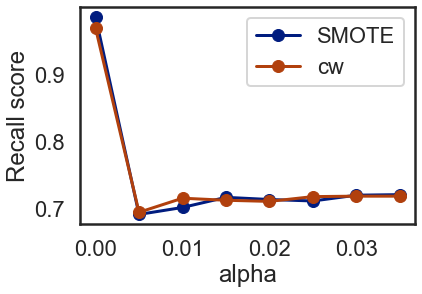

In [59]:
#Create DataFrame of Random Forest classifier using SMOTE-NC and class_weights based on Recall
df0 = pd.DataFrame(rf_df_SMOTE).set_index(rf_df_SMOTE.groupby(level = 0).cumcount(), append = True)
df1 = pd.DataFrame(rf_df_cw).set_index(rf_df_cw.groupby(level = 0).cumcount(), append = True)
recall_df_prune = pd.concat([df0, df1], axis = 1)
recall_df_prune.index = recall_df_prune.index.droplevel(1)


#Visualisation of DataFrame
sns.set_context("poster")
sns.set_palette("dark")
sns.set_style("white")

ax = recall_df_prune.plot(marker = "o")
ax.set(ylabel = "Recall score");

##### Validating Random Forest with pruning

In [60]:
#Retraining Random Forest using alpha = 0.03, SMOTE-NC method
rf_model_SMOTE_prune = RandomForestClassifier().set_params(n_estimators = 50, bootstrap = True, n_jobs = -1, random_state = 2020, ccp_alpha = 0.03)
rf_model_SMOTE_prune.fit(X_train_res, y_train_res)
rf_y_pred = rf_model_SMOTE_prune.predict(X_valid)

In [61]:
#Generating the scoring matrix of the Random Forest classifier
class_report(y_valid, rf_y_pred)
performance_score(y_valid, rf_y_pred)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      5848
           1       0.24      0.69      0.36       742

    accuracy                           0.72      6590
   macro avg       0.60      0.71      0.59      6590
weighted avg       0.87      0.72      0.77      6590

   accuracy  precision    recall       f1       auc
0  0.721093   0.241753  0.691375  0.35824  0.708119


### 3.3.2 Feature importance

In [62]:
#Obtaining feature importance list from the Random Forest model
feature_impt = dict(zip(feature_cols, rf_model_SMOTE_prune.feature_importances_.tolist()))
df_feature_impt = pd.DataFrame.from_dict(feature_impt, orient = "index", columns = ["Feature Importance"])

In [63]:
#Absolute the feature importance for comparability
df_feature_impt = df_feature_impt.abs()

#Sort the feature importance in descending order
df_feature_impt.sort_values("Feature Importance", ascending = False)

,Feature Importance
EVI,0.310558
p_outcome_success,0.181033
p_outcome_nonexistent,0.162162
CCI,0.134271
contact_cellular,0.108108
contact_telephone,0.068294
CPI,0.017466
age,0.012643
month_oct,0.003591
job_blue-collar,0.001873


### 4 Evaluation

In [64]:
#Testing Random Forest model with the test set
rf_model_SMOTE_prune = RandomForestClassifier().set_params(n_estimators = 50, bootstrap = True, n_jobs = -1, random_state = 2020, ccp_alpha = 0.03)
rf_model_SMOTE_prune.fit(X_train_res, y_train_res)
rf_y_pred = rf_model_SMOTE_prune.predict(X_test)

In [65]:
#Defining the confusion matrix functions
import sklearn.metrics as sklm
from sklearn.metrics import precision_recall_curve

def print_metrics(labels, predicted):
    metrics = sklm.precision_recall_fscore_support(labels, predicted)
    conf = sklm.confusion_matrix(labels, predicted)
    print('                            Confusion matrix')
    print('                 Predicted positive    Predicted negative')
    print('Actual positive    %6d' % conf[1,1] + '                  %5d' % conf[1,0])
    print('Actual negative    %6d' % conf[0,1] + '                  %5d' % conf[0,0])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, predicted))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, predicted))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][1] + '        %6d' % metrics[3][0])
    print('Precision  %6.2f' % metrics[0][1] + '        %6.2f' % metrics[0][0])
    print('Recall     %6.2f' % metrics[1][1] + '        %6.2f' % metrics[1][0])
    print('F1         %6.2f' % metrics[2][1] + '        %6.2f' % metrics[2][0])


In [66]:
#Extracting the Random Forest model's confusion matrix
print_metrics(y_test, rf_y_pred)

                            Confusion matrix
                 Predicted positive    Predicted negative
Actual positive       651                    277
Actual negative      2040                   5270

Accuracy        0.72
AUC             0.71
Macro precision 0.60
Macro recall    0.71
 
           Positive      Negative
Num case      928          7310
Precision    0.24          0.95
Recall       0.70          0.72
F1           0.36          0.82
